# Neural Network
 - Chapter 2까지 작업은 가중치 작업을 수동으로 해야했다. 
 - Neural Network부터는 자동으로 학습하는 능력을 알아 볼 것이다.
 - 입력층 -> 은닉층 -> 출력층 구조로 되어있다. 
 
 $y = 0 \ (b + w1x1 + w2x2 <=0)$ <br>
 $y = 1 \ (b + w1x1 + w2x2  > 0)$

## Activation Function 
 $a = b + w1x1 + w2x2$ <br>
 $ y = h(a) $
 
 - 임계값을 경계로 출력이 바뀌는 것을 Step function 이라고 한다. 

## 1. Sigmoid function 
 $ h(x) = 1 / (1 + exp(-x))  $ 
 - 출력 0~1

### 1.1 Compare with Step function and Sigmoid function

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

#### 1.1.1 Step function

In [3]:
# numpy array 지원 X
def step_function(x):
    if x>0:
        return 1
    else:
        return 0 

In [4]:
# numpy array 지원
def step_function(x):
    y = x>0
    return y.astype(np.int)

In [5]:
# more simple
def step_function(x):
    return np.array(x>0, dtype=np.int)

In [6]:
x = np.array([-1.0,1.0,2.0])
y = x>0
y

array([False,  True,  True], dtype=bool)

In [7]:
y.astype(np.int)

array([0, 1, 1])

(-0.1, 1.1)

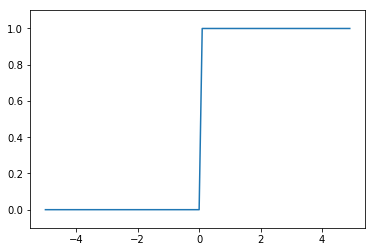

In [8]:
x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)

#### 1.1.2 Sigmoid function

In [9]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))


In [10]:
x1 = np.array([-1.0,1.0,2.0])
sigmoid(x1)

array([ 0.26894142,  0.73105858,  0.88079708])

(-0.1, 1.1)

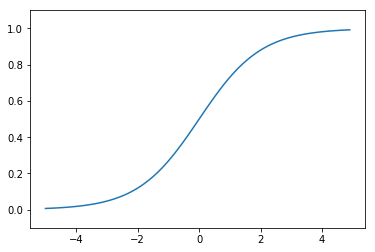

In [11]:
x1 = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(x1)
plt.plot(x1,y1)
plt.ylim(-0.1, 1.1)

### 1.1.3 Compare Two function
 - 두개 그래프 모두 비선형
 - 선형함수를 사용해서는 안된다. 선형함수를 사용한다면 신경망의 층을 깊게하는 의미가 없어진다.
 -  또한 신경망에서는 활성화 됐다 안됐다 라는 의미가 강하다.

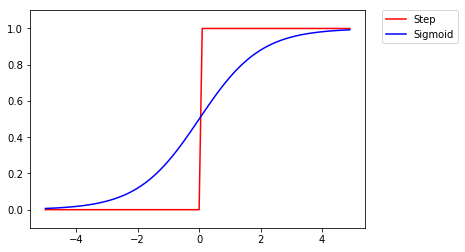

In [12]:
plt.plot(x,y,'r',label='Step')
plt.plot(x1,y1,'b', label='Sigmoid')
plt.ylim(-0.1, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)

## 2. reLU
 - $ h(x) = x ( x > 0) $
 - $ h(x) = 0 ( x <= 0 ) $


In [13]:
def relu(x):
    return np.maximum(0,x)

In [14]:
relu(x1)

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9])

## 3. Multi Demention Calculation

In [15]:
A = np.array([1,2,3,4])
A

array([1, 2, 3, 4])

In [16]:
np.ndim(A)

1

In [17]:
A.shape

(4,)

In [18]:
A.shape[0]

4

In [19]:
B = np.array([[1,2],[3,4],[5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [20]:
B.ndim

2

In [21]:
B.shape

(3, 2)

In [22]:
B.shape[0]

3

### 3.2 행렬의 내적(행렬의 곱)
![행렬의곱](img/1.jpg)

In [23]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [24]:
B = np.array([[5,6],[7,8]])
B

array([[5, 6],
       [7, 8]])

In [25]:
print(A.shape)
print(B.shape)

(2, 2)
(2, 2)


 - np.dot(A,B)와 np.dot(B,A)는 다른 값이 될 수 있다. 

In [26]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

 - 2 x 3
 - 3 x 2

In [27]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])

In [28]:
A.shape

(2, 3)

In [29]:
B.shape

(3, 2)

In [30]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [31]:
np.dot(B,A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

In [32]:
C = np.array([[1,2],[3,4]])
C

array([[1, 2],
       [3, 4]])

In [33]:
C.shape

(2, 2)

 - 2x3 과 2x2 오류 

In [34]:
np.dot(A,C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

### 행렬의 곱에서는 대응하는 차원의 원소수를 일치 
$ 3 x 2 (A)$    x    $2 x 4(B)$ = $3 x 4 (C)$

- A가 2차원, B가 1차원일때도 대응하는 차원의 원소수를 일치시켜라. 
 - $ 3x2(A) $ x $2(B)$ = $3(C)$

In [35]:
A = np.array([[1,2],[3,4],[5,6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [36]:
B = np.array([7,8])
B

array([7, 8])

In [37]:
A.shape

(3, 2)

In [38]:
B.shape

(2,)

In [39]:
np.dot(A,B)

array([23, 53, 83])

### 3.3 신경망의 내적 
![신경망](img/3.jpg)

In [40]:
X = np.array([1,2])
print(X)
print(X.shape)

[1 2]
(2,)


In [41]:
W = np.array([[1,3,5],[2,4,6]])
W

array([[1, 3, 5],
       [2, 4, 6]])

In [42]:
W.shape

(2, 3)

In [43]:
Y = np.dot(X,W)
Y

array([ 5, 11, 17])

### 3.4 3층 신경망 구현하기. 
<img src="img/2.jpg" width=500>

### 중요한 표기 
<img src="img/4.jpg" width=500>
<img src="img/5.jpg" width=500>

$$a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1^{(1)}$$
$$ Simple -> A^{(1)} = XW^{(1)} + B^{(1)}$$

<img src="img/9.PNG" width=500>

In [44]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

In [45]:
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [46]:
A1 = np.dot(X,W1) + B1
A1

array([ 0.3,  0.7,  1.1])

<img src="img/6.jpg" width=500>

In [47]:
Z1 = sigmoid(A1)
Z1

array([ 0.57444252,  0.66818777,  0.75026011])

<img src="img/7.jpg" width=500>

In [48]:
W2 = np.array([[.1,.4],[.2,.5],[.3,.6]])
W2

array([[ 0.1,  0.4],
       [ 0.2,  0.5],
       [ 0.3,  0.6]])

In [49]:
B2 = np.array([.1,.2])
B2

array([ 0.1,  0.2])

In [50]:
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [51]:
A2 = np.dot(Z1,W2) + B2
A2

array([ 0.51615984,  1.21402696])

In [52]:
Z2 = sigmoid(A2)
Z2

array([ 0.62624937,  0.7710107 ])

<img src="img/8.jpg" width=500>

In [53]:
def identity_function(x):
    return x

In [54]:
W3 = np.array([[.1,.3],[.2,.4]])
B3 = np.array([.1,.2])

A3 = np.dot(Z2,W3) + B3
A3

array([ 0.31682708,  0.69627909])

In [55]:
Y = identity_function(A3)
Y

array([ 0.31682708,  0.69627909])

### 구현정리 

In [70]:
def init_network():
    network = {}
    network['W1'] = np.array([[1,3,5],[2,4,6]]) / 10
    network['b1'] = np.array([1,2,3]) / 10 
    network['W2'] = np.array([[1,4],[2,5],[3,6]]) / 10
    network['b2'] = np.array([1,2]) / 10
    network['W3'] = np.array([[1,3],[2,4]]) / 10
    network['b3'] = np.array([1,2]) / 10
    return network

In [74]:
def forward(network, x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = identity_function(a3)
    
    return y

In [75]:
network = init_network()

In [76]:
x = np.array([1,5]) / 10
y = forward(network,x)
print(y)

[ 0.31234736  0.6863161 ]
